<div class="alert alert-info">
<font size="5"><b>Исследование объявлений о продаже квартир</b></font>


</div>

## Описание проекта. 
В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Задача: выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

## Описание данных. 
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


## Изучение общей информации о данных. 

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#чтение csv-файла
try:
    data = pd.read_csv(r'\Users\Katty\Yandex\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#основная информация о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#увеличиваем максимальное количество отображающихся столбцов 
pd.set_option('display.max_columns', None)
#первые 15 строк датафрейма  
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


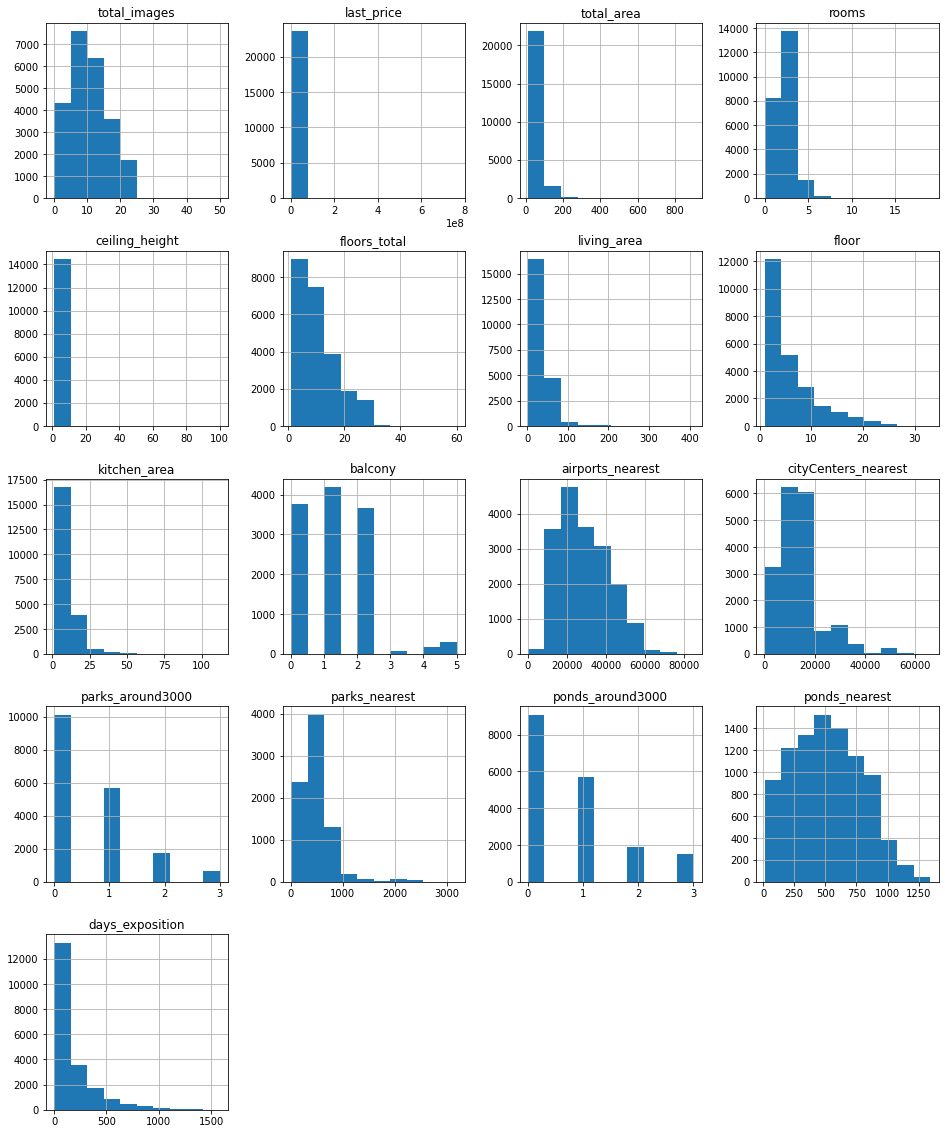

In [5]:
#гистограммы для всех числовых столбцов таблицы
data.hist(figsize=(16, 20));

После просмотра данных, можно заметить, что есть много пропусков в различных столбцах, неверные типы данных, а также выбивающиеся (странные) значения.

## Предобработка данных

### Пропущенные значения

In [6]:
#кол-во пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть в столбцах: высота потолков, кол-во этажей в доме, жилая площадь, апартаменты или нет, площадь кухни, наличие балкона, название населенного пункта, близость к аэропорту, близость к центру города, наличие парков и водоемов и расстояние до них, а также количество дней размещения объявления.

Пропуски с наличием или нет балкона, водоема, леса - могут быть связаны с его отсутствием. Некоторые пропуски могут быть из-за незнания точных квадратов квартиры (кухни), или специально не указаны, так как малы, но хотят привлечь внимание для потенциальных покупателей. Остальные обычно заполняются автоматически при написании адреса, ведь в сервис недвижимости всегда интегрирована карта, следовательно сервис сам может посчитать расстояние до парка/водоема/центра города/аэропорта, поэтому это похоже на техническую ошибку.

In [7]:
#если балкон не указали, то его скорее всего нет => Nan заменим на 0
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [8]:
#аналогично, если рядом водоем не указали, то их скорее всего рядомнет
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0
#и парк
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0

Пропуск в площади кухни логичен, если это студия, ведь площадь кухни автоматически равна 0.

In [9]:
#заполним пропуски площади кухонь для студий
for i in data['studio']:
    data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0   

Если человек пропустил строчку, что это апартаменты, то скорее всего у него квартира. Не будем учитывать злые умыслы, в которых апартаменты продают за квартиры.

In [10]:
#заполним пропуски для объявлений, не являющимися апартаментами
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

Есть еще 49 строк с пропущенным населенным пунктом, 49 значительно мало со всей выборкой, а локация играет важную роль, значит их удалим.

In [11]:
#удаление строк с незаполненным населенным пунктом
data = data[~data['locality_name'].isna()].reset_index(drop=True)

Также поступим с 85ью строками, где не указано количество этажей в доме.

In [12]:
#удаление строк с незаполненным количеством этажей.
data = data[~data['floors_total'].isna()].reset_index(drop=True)

Помимо прошлых пропусков у нас есть столбец 'высота потолков', который незаполнен почти на половину.

In [13]:
#медианное значение для высоты потолков
m = data['ceiling_height'].median()
m

2.65

In [14]:
#среднее значение высоты потолков
sr = data['ceiling_height'].mean()
sr

2.7712830605621157

Заметим, что медиана и среднее почти совпали, то есть нет невероятно больших или очень маленьких значений. Заменим пропуски на медианное значение.

In [15]:
#заполняем пропуски
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = m

In [16]:
#проверим что пропусков не осталось
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2076
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Типы данных в столбцах

In [17]:
#посмотрим типы данных столбцов (Dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21489 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Заметим, что столбец 'first_day_exposition'  (первый день публикации) - имеет тип данных object (строка), также как и столбец 'is_apartment' (апартаменты или нет), а количество этажей, балконов, парков, водоемов - float. Переведем первое в тип datetime, второе - в bool, остальные - в int для удобной работы с датафреймом.

In [18]:
#изменение типов данных в столбцах
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')

data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [19]:
#округлим количество дней в целые, перевести столбец в тип int не выйдет, из-за большого количества пропусков
data['days_exposition'] = round(data['days_exposition'])

In [20]:
#проверим, что типы данных стали верными
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21489 non-null  float64       
 13  balcony         

### Уникальные значения названий населенного пункта

In [21]:
#посмотрим названия населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
len(data['locality_name'].unique())

364

In [23]:
#создадим список из столбца
city = data['locality_name'].tolist()
#создадим список, из которого будем делать новый столбец
new_city = []

#заберем из каждлого элемента списка только последнее слово = название населенного пункта, добавим его в новый список
for i in range(len(city)):
    temp = city[i].split()[-1]
    new_city.append(temp)
    
#создадим новый столбец с названиями и отдадим ему получившийся список
data['new_locality_name'] = new_city
data['new_locality_name'].head(10)

0    Санкт-Петербург
1             Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
5            Янино-1
6          Парголово
7    Санкт-Петербург
8             Мурино
9    Санкт-Петербург
Name: new_locality_name, dtype: object

In [24]:
#посмотрим сколько уникальных значений осталось
len(data['new_locality_name'].unique())

294

Из 364 уникальных значений осталось всего 294, то есть дубликатов названий населенных пунктов было достаточно много.

### Выбивающиеся значения

#### Столбец 'ceiling_height' (высота потолков)

In [25]:
#посмотрим уникальные значения столбца
data['ceiling_height'].sort_values(ascending = True).unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Можно заметить, что есть выбивающиеся (нереальные) значения: 14-100 м, логично предположить, что на самом деле это вещественные значения 1.4-10 м.

In [26]:
#избавимся от аномалии и разделим большие значения на 10
data.loc[data['ceiling_height'] > 10.5, 'ceiling_height'] = data['ceiling_height']/10

#### Столбец 'rooms' число комнат

In [27]:
#посмотрим уникальные значения столбца
data['rooms'].sort_values(ascending = True).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

Заметим, что есть объясвления, в которых указано, что они 0-комнатные.

In [28]:
#посчитаем кол-во таких квартир
len(data.loc[data['rooms']== 0])

194

Удалить данных таких квартир нельзя, так как их много.Попробуем найти причину такой ошибки: видимо, люди выставляющие объявления однокомнатных квартир, пропускали строку комнаты, поэтому она автоматически заполнялась нулем. Чтобы удостоверится, выведем медиану общей площади для таких квартир:

In [29]:
#медиана общей площади квартир с 0 комнат
data[data['rooms']== 0]['total_area'].median()

26.075000000000003

Получилась обычная площадь однокомнатной квартиры.

In [30]:
#избавимся от аномалии
data.loc[data['rooms']== 0, 'rooms'] = 1

Заметим, что в уникальных значениях количества комнат, есть и анамально большие (>12), удалим их.

In [31]:
#убираем выбивающиеся значения
data = data[data['rooms'] <= 12] 

#### Столбец 'floors_total' число этажей в доме

In [32]:
#посмотрим уникальные значения столбца
data['floors_total'].sort_values(ascending = True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37,
       52, 60])

Самое высокое здание в Ленинградской области - Лахта-цент, в ней 88 этажей, второе - Лидер Тауэр, в нем 42 этажа, третье - ЖК «Князь Александр Невский», в нем 37 этажей. Если учесть, что в первых двух нет ничего под продажу кроме офисов, эти данные стоит удалить - они выбиваются.

In [33]:
#убираем выбивающиеся значения
data = data[data['floors_total'] <= 37] 

#### Столбец 'last_price' финальная сумма продажи

In [34]:
#посмотрим уникальные значения столбца
data['last_price'].sort_values(ascending = True).unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

<AxesSubplot:>

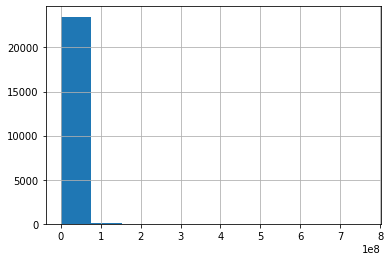

In [35]:
#гистограмма для столбца 'last_price'
data['last_price'].hist()

Заметим, что в столбце есть достаточно крупные выбивающиеся значения, которых настолько мало, что на гистограмме их не видно. Уберем их из нашей выборки, чтобы не было выбросов.

In [36]:
#количество неприлично дорогих квартир
len(data[data['last_price'] > 100000000 ])

37

In [37]:
#удалим выбивающиеся значения
data = data[data['last_price'] < 100000000 ]

<AxesSubplot:>

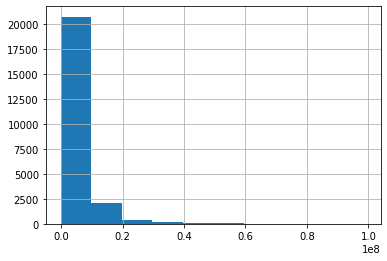

In [38]:
#гистограмма для столбца 'last_price'
data['last_price'].hist()

Можно увидеть как изменилась гистограмма, теперь явно виден не один столбец, а несколько. Но направление осталось то же: большинство квартир продают примерно за 10 000 000 руб.

## Новые столбцы

### Цена одного квадратного метра - 'one_square_meter'

In [39]:
#цена одного квадратного метра
data['one_square_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000


### День недели публикации объявления - 'weekday'

In [40]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1


In [41]:
#день недели публикации объявления текстом
data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter,weekday,day_of_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,Thursday
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1,Tuesday
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,Thursday
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.100629,4,Friday
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1,Tuesday


### Месяц публикации объявления - 'month'

In [42]:
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter,weekday,day_of_week,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,Thursday,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1,Tuesday,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,Thursday,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.100629,4,Friday,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1,Tuesday,6


### Год публикации объявления - 'year'

In [43]:
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter,weekday,day_of_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,Thursday,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1,Tuesday,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,Thursday,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.100629,4,Friday,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1,Tuesday,6,2018


### Тип этажа квартиры - 'floor_category'

In [44]:
# функция floor_type()
def floor_type(row):
    if (row['floor'] == 1):
        return 'первый'
    elif (row['floor'] == row['floors_total']) :
        return 'последний'
    else:
        return 'другой' 

In [45]:
#тип этажа квартиры (значения — «первый», «последний», «другой»);
data['floor_category'] = data.apply(floor_type, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter,weekday,day_of_week,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,Thursday,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1,Tuesday,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,Thursday,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.100629,4,Friday,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1,Tuesday,6,2018,другой


### Расстояние до центра города в километрах - 'km_to_center'

In [46]:
#расстояние до центра города в километрах (округленные до целых значений)
data['km_to_center'] = data['cityCenters_nearest']/1000
data['km_to_center'] = round(data['km_to_center'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter,weekday,day_of_week,month,year,floor_category,km_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,Thursday,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Шушары,82920.792079,1,Tuesday,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,Thursday,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург,408176.100629,4,Friday,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург,100000.000000,1,Tuesday,6,2018,другой,8.0


## Анализ данных

### Изучение всех параметров

#### Общая площадь

<AxesSubplot:>

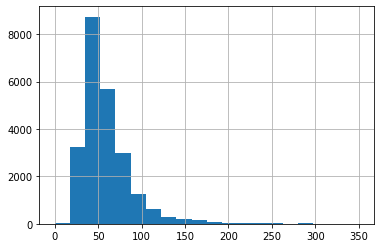

In [47]:
#гистограмма для столбца 'total_area'
data['total_area'].hist(bins = 20, range = (0, 350))

По гистограмме видно, что самый большой пик это квартиры с площадью в 40-50 кв.м, то есть их больше всего. Очень мало квартир с площадью больше 200, избавимся от них, так как они выбиваются и создают выбросы. После этого снова построем гистограмму.

In [48]:
#убираем выбивающиеся значения
data = data[data['total_area'] <= 200] 

<AxesSubplot:>

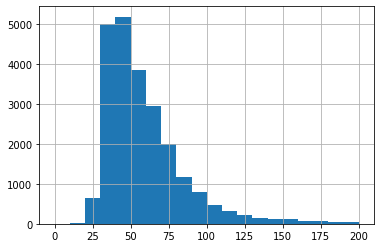

In [49]:
#гистограмма для столбца 'total_area'
data['total_area'].hist(bins = 20, range = (0, 200))

Гистограмма стала более точная, так как корзин много. Теперь видно, что пика 2: один на 30-40, второй на 40-50 метров кв. Меньше всего квартир до 20 и после 180 метров кв.

#### Жилая площадь

<AxesSubplot:>

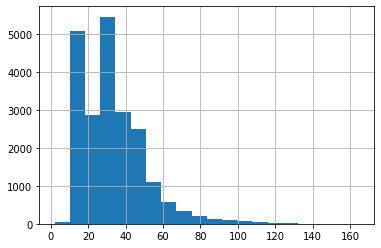

In [50]:
#гистограмма для столбца 'living_area'
data['living_area'].hist(bins = 20)

In [51]:
#количество значений больше 120 м кв.
len(data[data['living_area'] > 120])

49

Жилая площадь в основном лежит между 15 и 60 метрами кв. Два пика указывают на большое количество (около 5000 объявлений) с достаточно малой жилой площадью 10-20 м кв., а также (ококло 5.5 тысяч) 30 м кв. Также есть очень малое количество квартир (49 шт) с жилой площадью более 120 квадратов, уберем их. 

In [52]:
#убираем выбивающиеся значения
data = data[data['living_area'] <= 120] 

<AxesSubplot:>

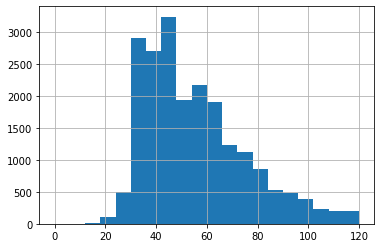

In [53]:
#гистограмма для столбца 'living_area'
data['total_area'].hist(bins = 20, range = (0, 120))

Чаще всего показатели жилой площади находятся в промежутке 30-45 м кв.

#### Площадь кухни

<AxesSubplot:>

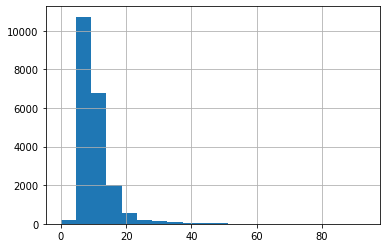

In [54]:
#гистограмма для столбца 'kitchen_area'
data['kitchen_area'].hist(bins = 20)

In [55]:
#количество значений больше 40 м кв.
len(data[data['kitchen_area'] > 40])

83

Площадь кухни в основном меньше 20 м кв, также есть кухни в 0 кв м, но это из-за того, что у нас есть студии. Также как и выше избавимся от количесвта данных которых мало, это кухни с квадратурой больше 40.

In [56]:
#убираем выбивающиеся значения
data = data[data['kitchen_area'] <= 40] 

<AxesSubplot:>

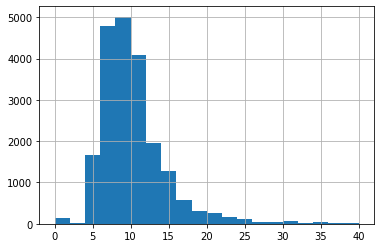

In [57]:
#гистограмма для столбца 'kitchen_area'
data['kitchen_area'].hist(bins = 20, range=(0, 40))

Теперь гистограмма более подробная, но смысл остался тем же, самые частные данные это от 6 до 12 м кв.

#### Сумма продажи объекта

<AxesSubplot:>

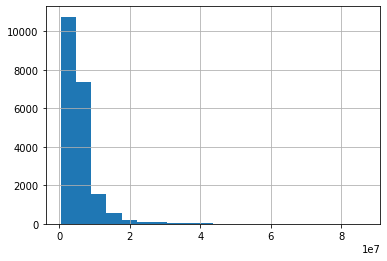

In [58]:
#гистограмма для столбца 'last_price'
data['last_price'].hist(bins = 20)

In [59]:
#количество цен выше 60000000 руб
len(data[data['last_price'] > 60000000])

17

Финальная цена недвижимости в основном лежит до 10 000 000, но также есть значения, которые не видно на гистограмме (цена более 60000000 руб), избавимся от этих данных.

In [60]:
#убираем выбивающиеся значения
data = data[data['last_price'] <= 60000000] 

<AxesSubplot:>

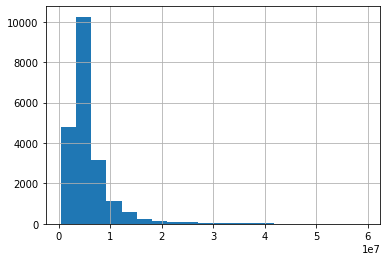

In [61]:
#гистограмма для столбца 'kitchen_area'
data['last_price'].hist(bins = 20)

Теперь у нас совершенно другая гистограмма, видно что пик - это объекты стоимостью 5-7 млн рублей, независимо от этого тоже много объектов до 5 млн рублей.

#### Количество комнат

<AxesSubplot:>

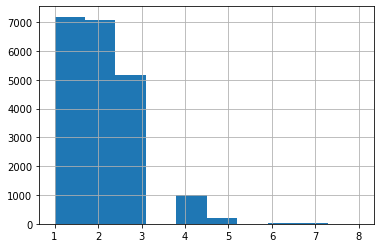

In [62]:
#гистограмма для столбца 'rooms'
data['rooms'].hist()

Гистограмма показала нам совершенно нормальное распределение, больше всего в нашем датасете 1-2 квартир, немного меньше 3-х комнатных, а остальных сравнительно мало.

#### Высота потолков

<AxesSubplot:>

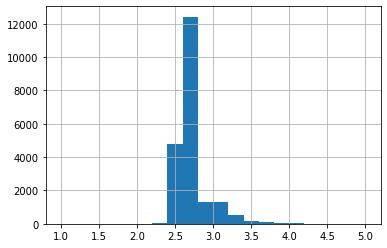

In [63]:
#гистограмма для столбца 'ceiling_height'
data['ceiling_height'].hist(bins = 20, range = (1, 5))

В недвижимости в Ленинградской области преобладают высокие потолки, если ориентироваться на полученный результат, то заметный пик на отрезке 2.6 м - 2.8 м. Скорее всего это вообще одно число, просто люди могут ошибаться в измерениях, а также строители построить криво.

#### Этаж квартиры

<AxesSubplot:>

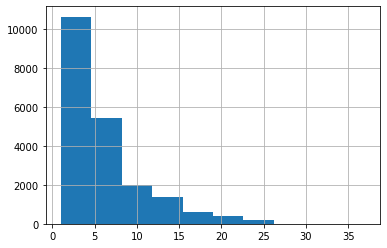

In [64]:
#гистограмма для столбца 'floor'
data['floor'].hist(range = (1, 37))

Люди живут чаще всего до 5 этажа, это связано с тем, что еще много 5-этажных зданий есть в нашей стране. А так распределение вполне обычное, так как много этажных зданий меньше, чем мало этажных.

#### Тип этажа квартиры

<AxesSubplot:>

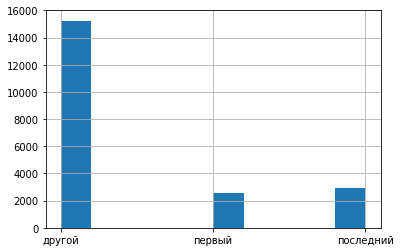

In [65]:
#гистограмма для столбца 'floor_category'
data['floor_category'].hist()

Гистограмма для типа этажа квартиры оказалась ожидаемой, люди стараются не выбирать первый и последний этаж, а также остальных этажей в сумме гораздо больше. По нашим данным выходит, что около 15 тысяч (а это больше 2/3 выборки) живот на 'других' этажах.

#### Общее количество этажей в доме

<AxesSubplot:>

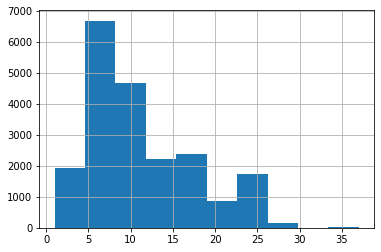

In [66]:
#гистограмма для столбца 'floors_total'
data['floors_total'].hist()

Как и предпологалось в пункте выше, в нашей стране много малоэтажных домов (5-этажки), но основную массу составляет недвижимость с этажностью до 12. Застройка высокоэтажными зданиями в Ленинградской области пока идет плохо, хотя и это можно объяснить, ведь самый крупный город - культурное наследие, в котором весь центр заполнен, а если строят что-то новое подальше от центра, где это возможно. А в остальных населенных пунктах вообще и не нужны высотки, так как население не велико.

#### Расстояние до центра города в метрах

<AxesSubplot:>

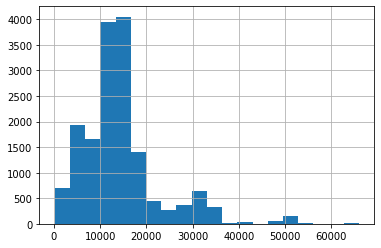

In [67]:
#гистограмма для столбца 'cityCenters_nearest'
data['cityCenters_nearest'].hist(bins =20)

Ленинградская область - не самый маленький регион страны, поэтому добираться до центра города можно долго, во первых потому что можно жить на окраине Санкт-Петербурга (самый большой город => самое большое расстояние от окраины до центра), во вторых можно жить не в городе, а в деревне, и тогда расстояние до ближайшего города также окажется немалым. Поэтому данные с сильно большим расстоянием не стоит удалять, так как тогда удалится целая деревня или поселок.

В гистограмме пик достигается на значениях 10-15 км, на машине это 15-20 минут, не так уж и далеко, то есть большая часть недвижимости находится достаточно близко к центру города.

*Но не забудем, что была техническая ошибка и пропусков в столбцах с расстояниями очень много, и при их заполнении пользователями, гистограмма может сильно изменится.*

#### Расстояние до ближайшего аэропорта

<AxesSubplot:>

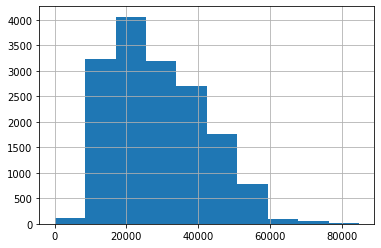

In [68]:
#гистограмма для столбца 'airports_nearest'
data['airports_nearest'].hist()

Аэропорты всегда находятся загородом, поэтому расстояния такие большие (18-35 км), при этом у нас в датасете оказалась недвижимость, которая находится вблизи к аэпоропорту, наверное, там есть жилье для пилотов и персонала аэропорта.

*Но не забудем, что была техническая ошибка и пропусков в столбцах с расстояниями очень много, и при их заполнении пользователями, гистограмма может сильно изменится.*

#### Расстояние до ближайшего парка

<AxesSubplot:>

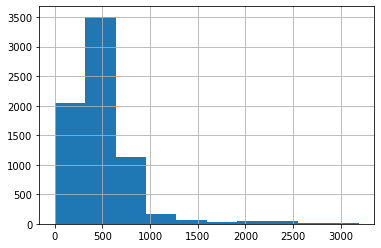

In [69]:
#гистограмма для столбца 'parks_nearest'
data['parks_nearest'].hist()

Большинство недвижимости имеет парк вблизи, а некоторые находятся пососедству с парком. Так как в нашей стране достаточно много зелени, а ленинградская область - это не промышленный центр, данные кажутся вполне реальными.

*Но не забудем, что была техническая ошибка и пропусков в столбцах с расстояниями очень много, и при их заполнении пользователями, гистограмма может сильно изменится.*

#### День и месяц публикации объявления

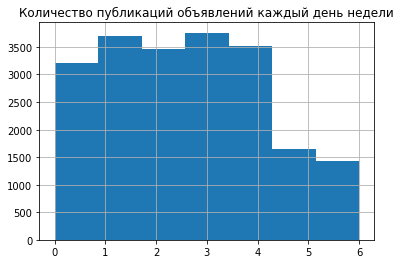

In [70]:
#гистограмма для столбца 'weekday'
data['weekday'].hist(bins = 7)
plt.title("Количество публикаций объявлений каждый день недели")
plt.show()

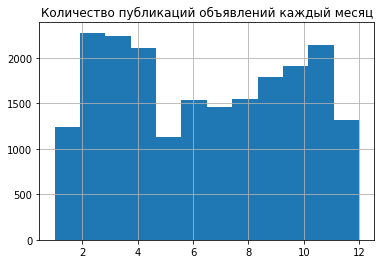

In [71]:
#гистограмма для столбца 'month'
data['month'].hist(bins = 12)
plt.title("Количество публикаций объявлений каждый месяц")
plt.show()

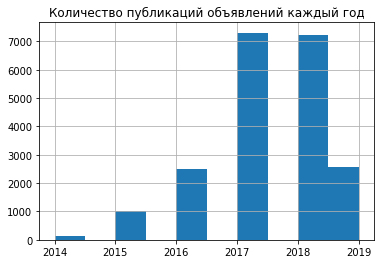

In [72]:
#гистограмма для столбца 'year'
data['year'].hist()
plt.title("Количество публикаций объявлений каждый год")
plt.show()

Самым популярным месяцем публикации объявления оказался февраль, а самым популярным днем недели - четверг. Если посмотреть на гистограмму публикации объявлений по годам, то можно заметить большой подъем с 2014 по 2018 год, а потом количество пошло на спад.

### Быстрая продажа квартир

<AxesSubplot:>

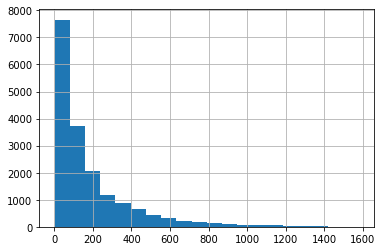

In [73]:
#гистограмма, показывающая сколько дней продавалась недвижимость
data['days_exposition'].hist(bins = 20)

График похож на распределения Пуассона, что показывает правдоподобность данных.

In [74]:
#среднее кол-во дней
data['days_exposition'].mean()

183.29206260480714

In [75]:
#медиана кол-ва дней
data['days_exposition'].median()

100.0

In [76]:
#кол-во долгих продаж
len(data[data['days_exposition'] > 600])

1055

Среднее кол-во дней, которое уходит на продажу это примерно полгода, медиана в нашем датасете равна трем с половиной месяцам, что достаточно быстро для продажи квартиры, видимо это происходит из-за привлекательности региона. Адекватным временем для продажи квартиры считается полгода-год (180-360 дней). Также в данных есть очень долгие продажи от 600 дней (от ~20 месяцев), но их количество сотавляет около 1/23 от всех данных.

### Какие факторы влияют на полную стоимость объекта

#### Общая площадь

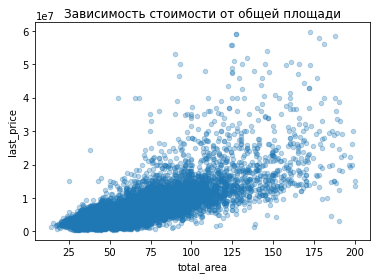

In [77]:
#диаграмма рассеяния
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.title("Зависимость стоимости от общей площади")
plt.show()

In [78]:
data['total_area'].corr(data['last_price'])

0.749914899651031

По диаграмме видно, что корреляция присутствует, притом коээфициент Пирсона положительный (график возрастающий) и достаточно близкий к 1, то есть цена сильно зависит от общей площади объекта.

#### Жилая площадь

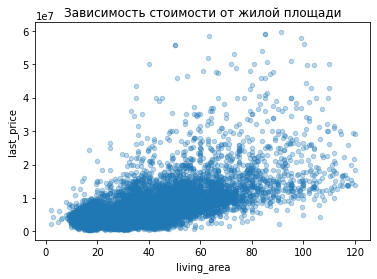

In [79]:
#диаграмма рассеяния
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
plt.title("Зависимость стоимости от жилой площади")
plt.show()

In [80]:
data['living_area'].corr(data['last_price'])

0.6427654072150017

С жилой площадью ситуация похожа, так же есть корреляция, и есть зависимость от цены. Правда, нужно помнить о том, что в столбце 'living_area' было много пропусков, которые могли бы изменить ситуацию. Логически коэффициент Пирсона бы увеличился.

#### Площадь кухни

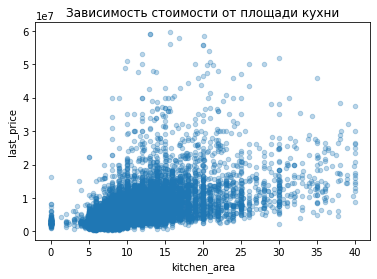

In [81]:
#диаграмма рассеяния
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
plt.title("Зависимость стоимости от площади кухни")
plt.show()

С площадью кухни не все так ярко видно, как с общей площадью. Корреляция явно присутсвует, но она гораздо меньше, но в любом случае цена объекта также зависит от площади кухни.

In [82]:
data['kitchen_area'].corr(data['last_price'])

0.5514842826636798

#### Количество комнат

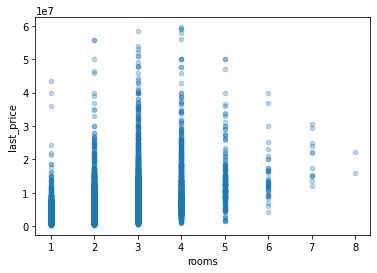

In [83]:
#диаграмма рассеяния
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3);

In [84]:
data['rooms'].corr(data['last_price'])

0.45816411544630137

Связь между количеством комнакт и стоимость объекта, есть но не очень тесная. Здесь легко предоложить, что огромная однушка может быть привлекательнее двушки с очень маленькими комнатами, поэтому зависимость цены и количества комнат есть, но небольшая.

#### Тип этажа

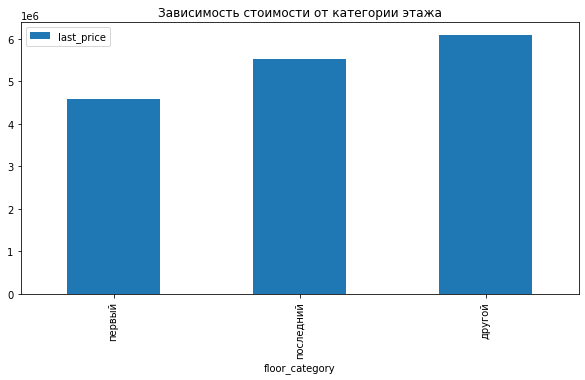

In [85]:
#создадим сводную таблицу, в которой посчитаем среднюю цену в каждый категории этажа
data635 = data.pivot_table(index = 'floor_category', values = 'last_price')
data635.columns = ['last_price']
#столбчатая диаграмма
data635.sort_values('last_price', ascending = True).plot(y = 'last_price', kind='bar', figsize=(10, 5))
plt.title("Зависимость стоимости от категории этажа")
plt.show()

Зависимость стоимости от этажа есть. Можно заметить, что первый этаж заметно снижает стоимость объекта. Люди все же предпочитают жить не на первом и не на последнем.

#### Даты размещения

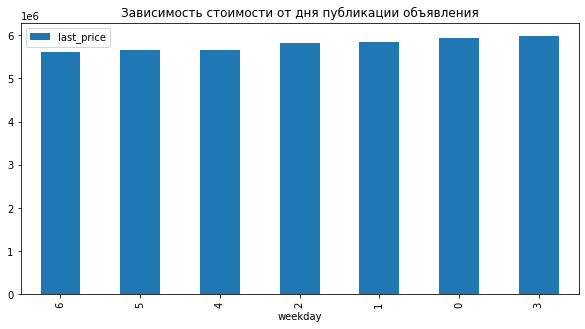

In [86]:
#создадим сводную таблицу, в которой посчитаем среднюю цену в каждый день недели публикации объявления
data636 = data.pivot_table(index = 'weekday', values = 'last_price')
data636.columns = ['last_price']
#столбчатая диаграмма
data636.sort_values('last_price', ascending = True).plot(y = 'last_price', kind='bar', figsize=(10, 5))
plt.title("Зависимость стоимости от дня публикации объявления")
plt.show()

День недели размещения не влияет на полную стоимость. Это в общем логично, покупатель явно не будет уделять внимания на день недели, когда выставлено объявление. Взгянув на диаграмму можно увидеть, что средняя цена почти везде равна (от 5.5 до 6 млн)

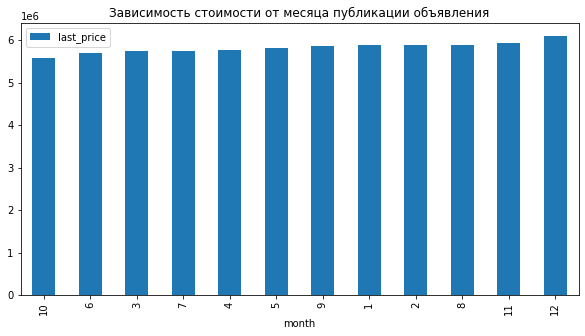

In [87]:
#создадим сводную таблицу, в которой посчитаем среднюю цену в каждый месяц публикации объявления
data637 = data.pivot_table(index = 'month', values = 'last_price')
data637.columns = ['last_price']
#столбчатая диаграмма
data637.sort_values('last_price', ascending = True).plot(y = 'last_price', kind='bar', figsize=(10, 5))
plt.title("Зависимость стоимости от месяца публикации объявления")
plt.show()

Здесь ситуация такая же, месяц выставления объявления совсем не влияет на финальную стоимость недвижимости.

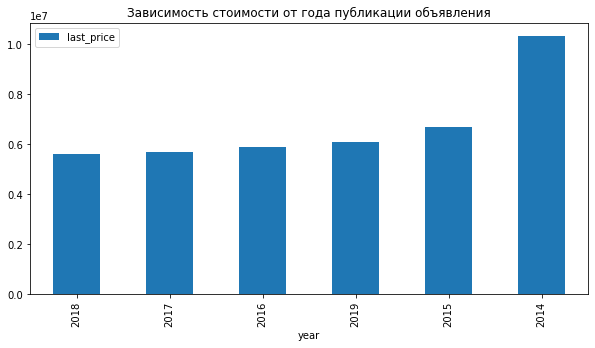

In [88]:
#создадим сводную таблицу, в которой посчитаем среднюю цену в каждый год публикации объявления
data638 = data.pivot_table(index = 'year', values = 'last_price')
data638.columns = ['last_price']
#столбчатая диаграмма
data638.sort_values('last_price', ascending = True).plot(y = 'last_price', kind='bar', figsize=(10, 5))
plt.title("Зависимость стоимости от года публикации объявления")
plt.show()

Год выставления объявления как не странно повлиял на стоимость, в 2014 году средняя цена на объект была выше, чем в 2015-1018 годах, хотя логично было бы предположить, что все было бы наоборот, так как каждый год идет инфляция.

### Средняя цена 1 кв.м

In [89]:
#10 населенных пунктов с наибольшим количеством объявлением
data41 = data.pivot_table(index = 'new_locality_name', values = 'last_price', aggfunc = 'count')
data41.columns = ['count of flats']
data41 = data41.sort_values(by ='count of flats',  ascending = False).head(10)
data41

,count of flats
new_locality_name,
Санкт-Петербург,13797
Мурино,479
Шушары,394
Кудрово,387
Всеволожск,362
Пушкин,328
Колпино,321
Гатчина,290
Парголово,290


Заметим, что 10 место по количеству объявлений занимает Выборг, в котором всего 190 объявлений, то есть все остальные населенные пункты гарантированно имеют меньшее количество недвижимости в продаже. И тогда больше половины данных у нас о нежвижимости в столице региона.

<AxesSubplot:ylabel='count of flats'>

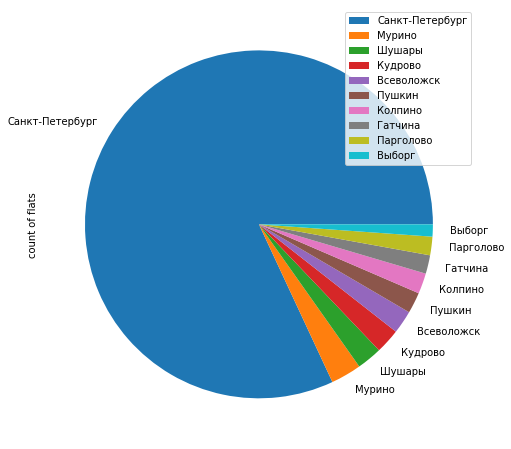

In [90]:
#круговая диаграмма, визуализирующая количество объявлений в 10 населенных пунктах с наибольшим их количеством
data41.plot(y = 'count of flats', kind='pie', figsize=(8, 8));

In [91]:
#сумма всех стоимостей объявлений в каждом населенном пункте
data42 = data.pivot_table(index = 'new_locality_name', values = 'last_price', aggfunc = 'sum')
data42.columns = ['sum of prices']
data42

,sum of prices
new_locality_name,
Агалатово,8970000.0
Александровская,3750000.0
Алексеевка,1000000.0
Аннино,41240000.0
Аро,9720000.0
...,...
Ялгино,777000.0
Яльгелево,15450000.0
Ям-Тесово,450000.0


In [92]:
#объединим две полученные таблицы
data4 = data41.join(data42, on='new_locality_name', rsuffix='_y')
data4

,count of flats,sum of prices
new_locality_name,,
Санкт-Петербург,13797,9.606457e+10
Мурино,479,1.816834e+09
Шушары,394,1.621682e+09
Кудрово,387,1.729070e+09
Всеволожск,362,1.371948e+09
Пушкин,328,1.982907e+09
Колпино,321,1.239950e+09
Гатчина,290,1.013169e+09
Парголово,290,1.301985e+09


In [93]:
#сумма всех площадей недвижимостей в каждом населенном пункте
data43 = data.pivot_table(index = 'new_locality_name', values = 'total_area', aggfunc = 'sum')
data43.columns = ['sum of meters^2']
data43

,sum of meters^2
new_locality_name,
Агалатово,122.70
Александровская,59.00
Алексеевка,45.00
Аннино,656.10
Аро,190.30
...,...
Ялгино,44.00
Яльгелево,279.90
Ям-Тесово,36.50


In [94]:
#объединим полученные таблицы
data4 = data4.join(data43, on='new_locality_name', rsuffix='_y')
data4

,count of flats,sum of prices,sum of meters^2
new_locality_name,,,
Санкт-Петербург,13797,9.606457e+10,838413.12
Мурино,479,1.816834e+09,21728.32
Шушары,394,1.621682e+09,21192.71
Кудрово,387,1.729070e+09,18351.81
Всеволожск,362,1.371948e+09,20153.20
Пушкин,328,1.982907e+09,18924.29
Колпино,321,1.239950e+09,16842.75
Гатчина,290,1.013169e+09,14811.08
Парголово,290,1.301985e+09,14792.44


In [95]:
#создадим новый столбец со средней ценой за кв.м. в населенном пункте
data4['average_price'] = data4['sum of prices'] / data4['sum of meters^2']
data4.sort_values('average_price', ascending = False)

,count of flats,sum of prices,sum of meters^2,average_price
new_locality_name,,,,
Санкт-Петербург,13797,9.606457e+10,838413.12,114579.042764
Пушкин,328,1.982907e+09,18924.29,104781.049329
Кудрово,387,1.729070e+09,18351.81,94217.946840
Парголово,290,1.301985e+09,14792.44,88016.950483
Мурино,479,1.816834e+09,21728.32,83615.927232
Шушары,394,1.621682e+09,21192.71,76520.761101
Колпино,321,1.239950e+09,16842.75,73619.196450
Гатчина,290,1.013169e+09,14811.08,68406.176997
Всеволожск,362,1.371948e+09,20153.20,68075.937568


<AxesSubplot:xlabel='new_locality_name'>

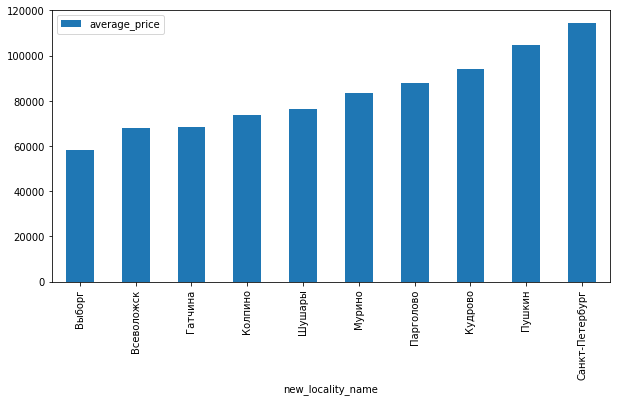

In [96]:
#столбчатая диаграмма, показывающая среднюю цену за 1 кв.м в этих же 10 населенных пунктах.
data4.sort_values('average_price', ascending = True).plot(y = 'average_price', kind='bar', figsize=(10, 5));

Заметим, что самая высокая цена за квадратный метр, как и требовалось ожидать, оказалась в Санкт-Петербурге (около 115 тысяч рублей), после него идет город Пушкин и город Кудрово, которые находятся недалеко от Северной столицы. А самая низкая цена за квадратный метр оказалась в Выборге (почти 58 тысяч рублей), который между всем являлся самым меленьким из них по количеству объявлений. Разница цен между первым и последним почти в 2 раза.

### Средняя цена каждого км от центра в Санкт-Петербурге

In [97]:
#сделаем выборку только по Санкт-Петербургу
data5 = data.loc[data['locality_name'] == 'Санкт-Петербург']
data5

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,one_square_meter,weekday,day_of_week,month,year,floor_category,km_to_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,120370.370370,3,Thursday,3,2019,другой,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,92785.714286,3,Thursday,8,2015,другой,14.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,Санкт-Петербург,88524.590164,6,Sunday,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,Санкт-Петербург,127525.252525,3,Thursday,11,2017,другой,14.0
15,16,4650000.0,39.00,2017-11-18,1,2.65,14,20.5,5,False,False,False,7.60,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19.0,Санкт-Петербург,119230.769231,5,Saturday,11,2017,другой,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23554,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.00,0,Санкт-Петербург,15632.0,14428.0,0,NaN,0,NaN,23.0,Санкт-Петербург,91089.108911,0,Monday,4,2019,другой,14.0
23555,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,Санкт-Петербург,100566.572238,2,Wednesday,2,2018,другой,16.0
23556,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,Санкт-Петербург,105769.230769,3,Thursday,7,2018,другой,6.0
23557,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,Санкт-Петербург,129903.978052,3,Thursday,10,2016,другой,4.0


In [98]:
#создадим сводную таблицу, в которой посчитаем среднюю цену за 1 кв.м 
data51 = data5.pivot_table(index = 'km_to_center', values ='one_square_meter')
data51.columns = ['one_square_meter']
data51

,one_square_meter
km_to_center,
0.0,207341.915565
1.0,137269.761835
2.0,143755.371893
3.0,117637.207615
4.0,126760.532029
5.0,133468.766755
6.0,141073.219269
7.0,144287.806769
8.0,124176.638850


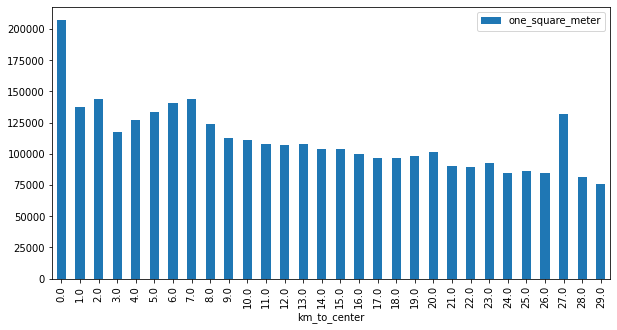

In [101]:
#столбчатая диаграмма, показывающая среднюю цену за 1 кв.м в этих же 10 населенных пунктах.
data51.plot(y = 'one_square_meter', kind='bar', figsize=(10, 5));

Как и следовало ожидать средняя цена для 1 кв.м самая дорогая в самом центре - 207 тысяч рублей, далее значения цены почти стабильно идут на спад с ростом километров от центра. Но есть выбивающееся значение это 27 км, цена за 1 кв.м. там примерно равна цене в 5 км от центра. Есть подозрение, что это объекты находящиеся в достаточно дорогом месте и туристическом - Кронштаде (он как раз находится в 27 км от центра)

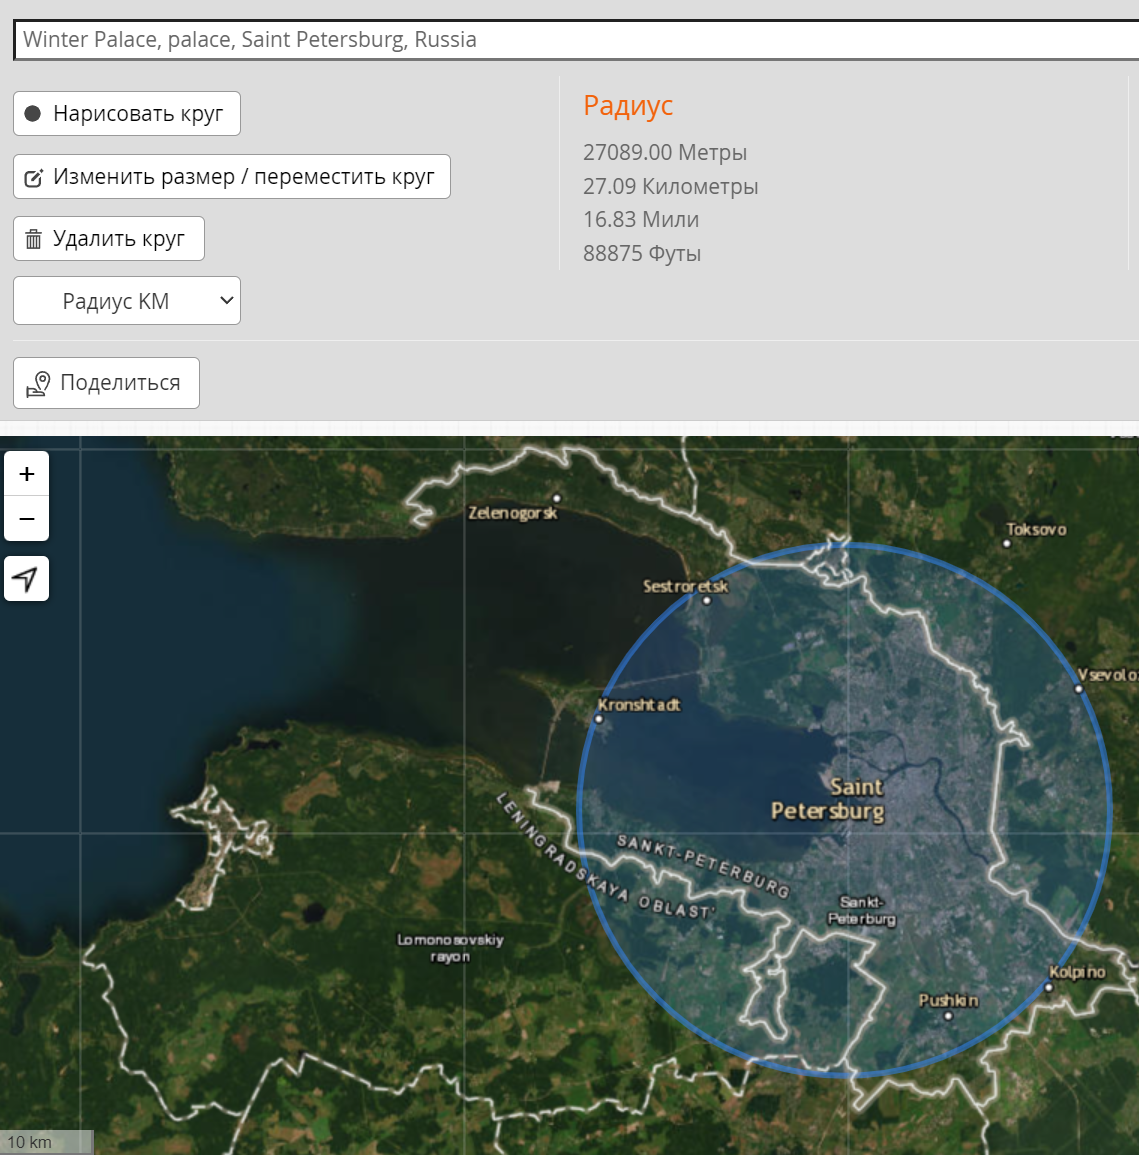

## Общий вывод

Были рассмотрены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

После была выполнена предобработку данных, в которой были найдены и по возможности заполнены пропуски в значениях, удалены выбивающиеся значения, замечены и устранены неявные повторы в названиях населенных пунктов.

Также была замечена техническая ошибка сервиса, так как пропусков в картографических данных было слишком много.

Далее в данные были добавлены столбцы для дальшейшего исследования: цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


Затем данные анализировали, находили зависимости, оказалось, что:
1) Стоимость объекта зависит от площади (общей, жилой, кухонной)

2) Стоимость зависит от категории этажа

3) Стоимость не зависит от дня публикации объявления, месяца

4) Стоимость зависит от года публикации объявления

Из вычисленных параметров, интересные:
Средняя стоимость кв.м. в Санкт-Петербурге составляет около 150 тысяч рублей, при этом чем дальше живешь от центра, тем дешевле цена за 1 квадратный метр объекта (есть исключения для туристических мест)


**Чек-лист готовности проекта**

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод